# Load and Read the Dataset

In [1]:
# load required libraries

import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
 
    

In [2]:
# Read the data set 

df = pd.read_csv('../input/rainfall-in-saudi-arabia/total-rain-fall-in-mm.csv', sep = ';')

df.shape # To view the number of rows and columns in the dataset
print('shape:', df.shape)

shape: (3476, 4)


In [3]:
# Check the null values and datatype for the variables
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 3476 non-null   int64  
 1   Month                3476 non-null   object 
 2   Region               3476 non-null   object 
 3   Total Rainfall (mm)  3476 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 108.8+ KB


# Clean and Prepare

In [4]:
df.head()

,Year,Month,Region,Total Rainfall (mm)
0,2009,January,Al-Ahsa,0.0
1,2009,January,Yenbo,0.0
2,2009,January,Abha,9.5
3,2009,January,Guriat,0.0
4,2009,January,Turaif,1.0


In [5]:
# There is two types of records for Riyadh city (Riyadh New & Riyadh Old). so I will remove values for 'Riyadh Old'

df['Region'].value_counts()

df.drop(df.index[df['Region'] == 'Riyadh Old'], inplace = True)

df


,Year,Month,Region,Total Rainfall (mm)
0,2009,January,Al-Ahsa,0.0
1,2009,January,Yenbo,0.0
2,2009,January,Abha,9.5
3,2009,January,Guriat,0.0
4,2009,January,Turaif,1.0
...,...,...,...,...
3471,2019,November,Taif,49.3
3472,2019,November,Najran,9.9
3473,2019,November,Sharorah,9.9
3474,2019,November,Riyadh New,16.2


In [6]:
# Change the month from text to number in order to create the column 'Date'
df.insert(2, 'Day', '01')
df = df.replace({'Month':{'January':1, 'February':2 , 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December': 12}})                                                                                         

# Adding a new column called 'Date'
date_format = pd.to_datetime(df[['Year', 'Month', 'Day']])
df.insert(3, 'Date', date_format)

df

,Year,Month,Day,Date,Region,Total Rainfall (mm)
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,11,01,2019-11-01,Taif,49.3
3472,2019,11,01,2019-11-01,Najran,9.9
3473,2019,11,01,2019-11-01,Sharorah,9.9
3474,2019,11,01,2019-11-01,Riyadh New,16.2


In [7]:
# Renaming columns

df['Region'] = df['Region'].replace(['Riyadh New'],'Riyadh')
df['Region'] = df['Region'].replace(['Jeddah KAIA'],'Jeddah')

df.rename(columns={'Total Rainfall (mm)': 'Rainfall'}, inplace=True)

df

,Year,Month,Day,Date,Region,Rainfall
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
...,...,...,...,...,...,...
3471,2019,11,01,2019-11-01,Taif,49.3
3472,2019,11,01,2019-11-01,Najran,9.9
3473,2019,11,01,2019-11-01,Sharorah,9.9
3474,2019,11,01,2019-11-01,Riyadh,16.2


In [8]:
# Check for missing values¶

df.isnull().sum()


Year        0
Month       0
Day         0
Date        0
Region      0
Rainfall    0
dtype: int64

# Explore the data

In [9]:
# View the fist 15 rows
df.head(15)

,Year,Month,Day,Date,Region,Rainfall
0,2009,1,01,2009-01-01,Al-Ahsa,0.0
1,2009,1,01,2009-01-01,Yenbo,0.0
2,2009,1,01,2009-01-01,Abha,9.5
3,2009,1,01,2009-01-01,Guriat,0.0
4,2009,1,01,2009-01-01,Turaif,1.0
5,2009,1,01,2009-01-01,Jeddah,1.0
6,2009,2,01,2009-02-01,Khamis Mushait,0.0
7,2009,2,01,2009-02-01,Madinah,0.0
8,2009,2,01,2009-02-01,Bisha,2.6
9,2009,2,01,2009-02-01,Taif,0.0


In [10]:
# Summary Statistics
df['Rainfall'].describe()

count    3440.000000
mean        6.933074
std        17.242435
min         0.000000
25%         0.000000
50%         0.001000
75%         5.600000
max       318.500000
Name: Rainfall, dtype: float64

In [11]:
# using groupby function with aggregation to get mean, min and max values for temprature per city
result = df.groupby('Region').agg({'Rainfall': ['mean', 'min', 'max']}).astype(int)
  
result

Rainfall         
                   mean min  max
Region                          
Abha                 14   0  243
Al-Ahsa               7   0   83
Al-Baha               9   0  167
Al-Jouf               7   0  183
Arar                  5   0  125
Bisha                 6   0  155
Dhahran               7   0   93
Dmmam                 7   0   78
Guriat                4   0   54
Hafr Elbatten         5   0   39
Hail                  3   0   35
Jeddah                4   0   75
Jizan                10   0  104
Khamis Mushait       12   0  180
Madinah               4   0   56
Makkah               10   0  105
Najran                5   0   90
Qaisumah              8   0  149
Qassim                7   0  150
Rafha                 6   0   87
Riyadh                7   0   70
Sharorah              2   0   90
Sulayel               4   0   49
Tabuk                 3   0   75
Taif                 10   0   81
Turaif                6   0   61
Wadi Aldawasir        1   0   47
Wejh                  6   0  318
Yenbo                 4   0   92

# Data Visualization

<AxesSubplot:>

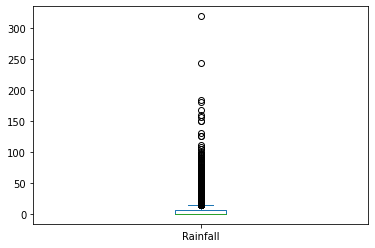

In [12]:
# Creating box plot to check for extreme value

df['Rainfall'].plot(kind='box')

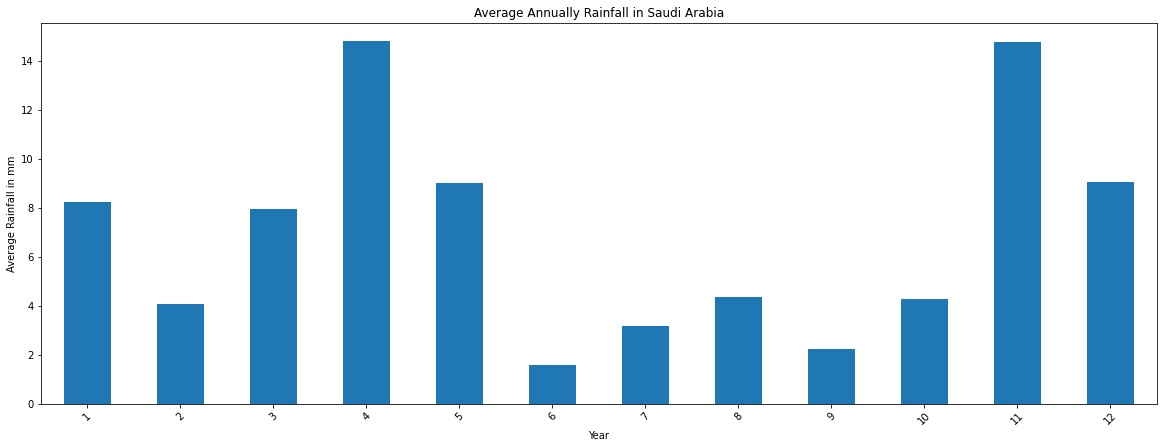

In [13]:
plt.figure(figsize = [20,7])
df.groupby('Month')['Rainfall'].mean().plot.bar()
plt.title('Average Annually Rainfall in Saudi Arabia')
plt.ylabel('Average Rainfall in mm')
plt.xlabel('Year')
plt.xticks(rotation=45)
plt.show()

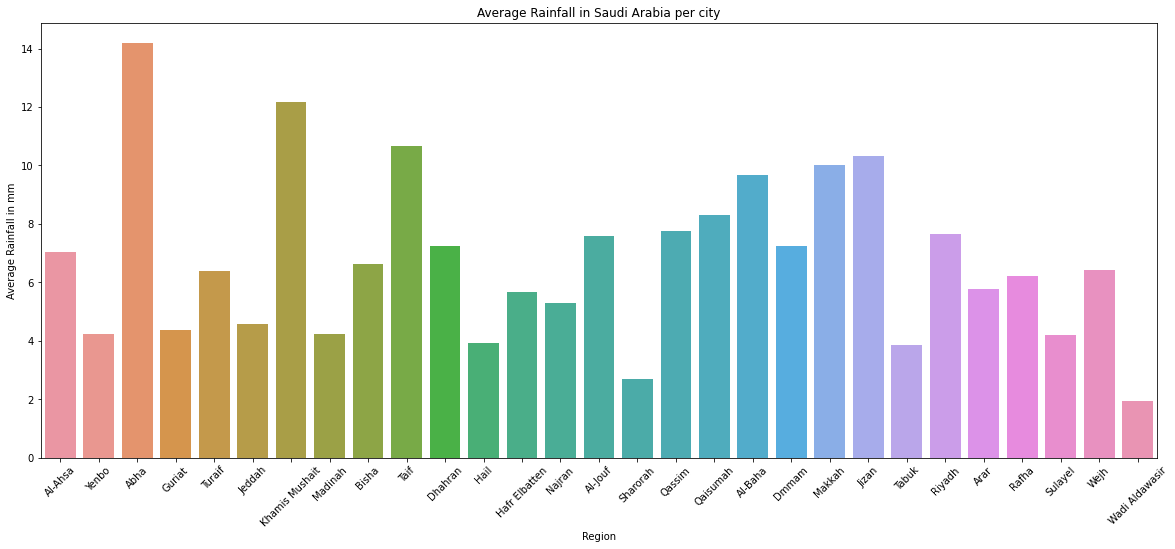

In [14]:
plt.figure(figsize = [20,8])
df.groupby('Year')['Rainfall'].mean()
plt.title('Average Rainfall in Saudi Arabia per city')
sns.barplot(data=df, x='Region', y='Rainfall', ci=None)
plt.xlabel('Region')
plt.ylabel('Average Rainfall in mm')
plt.xticks(rotation=45)
plt.show()


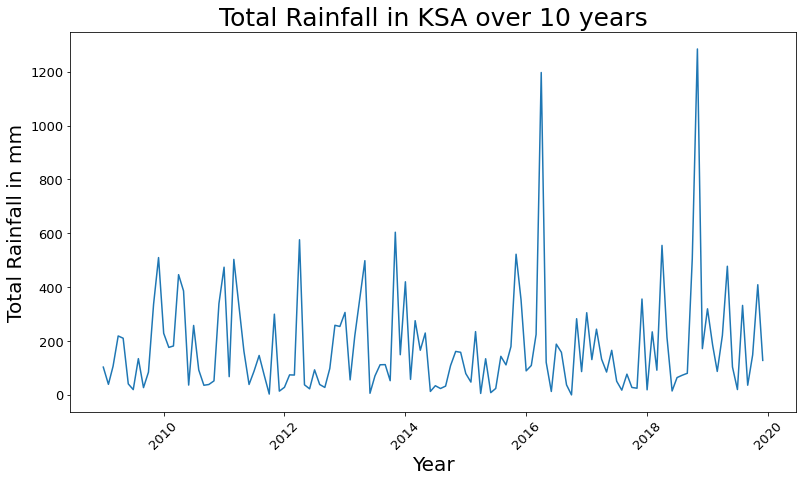

In [15]:
# Plot rainfall data over the years

import matplotlib.pyplot as plt
plt.figure(figsize=(13, 7))
plt.plot(df[['Date', 'Rainfall']].groupby(by = 'Date').sum())
plt.title('Total Rainfall in KSA over 10 years', fontsize=25)
plt.ylabel('Total Rainfall in mm', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.grid(False)
plt.xticks(rotation=45)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


Correlation matrix helps to identify the relationship between variables. When the value closer to (1) means there is strong positve linear relationship. Minus sign (-) refers to negative relationship (as one variable increases, the other one decreases).

<AxesSubplot:>

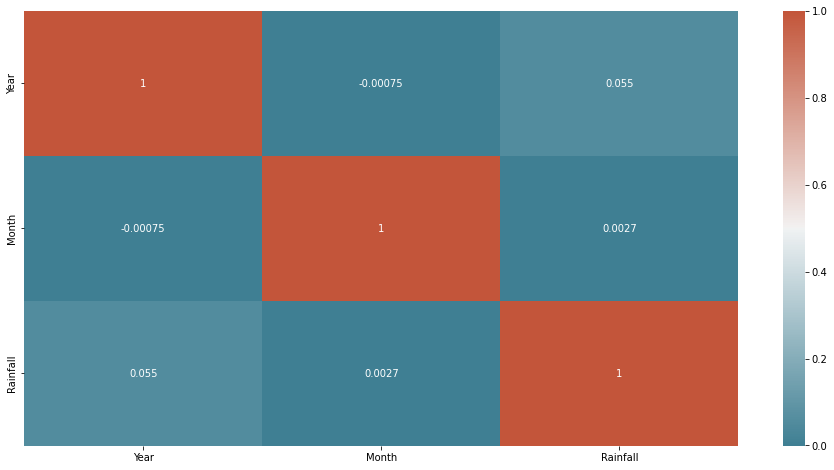

In [16]:
# calculate correlation matrix
corr = df.corr() # plot the heatmap
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

## Thank you for reading.